In [1]:
# Run this in the terminal to adjust new data rate limit
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [99]:
import pandas as pd
import json
import os
from collections import Counter
import numpy as np
from ydata_profiling import ProfileReport
import scispacy
import spacy
import matplotlib.pyplot as plt

In [18]:
data_dir = '/Users/s2531396/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/extracted/'

In [4]:
nlp = spacy.load("../en_core_sci_sm-0.5.3")

/Users/s2531396/anaconda3/lib/python3.11/site-packages/spacy/language.py:2141: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


### Reading files functions

In [5]:
def one_json_to_df (file):
    json_file = open(file)
    json_dicc = json.load(json_file)
    df_generalDesc = pd.json_normalize(json_dicc['generalDesc'])
    df_contributionDesc_authors = pd.json_normalize(json_dicc ['contributionDesc']['authors'])
    df_curators = pd.json_normalize(json_dicc ['contributionDesc']['curators'])
    df_institutions = pd.json_normalize(json_dicc ['contributionDesc']['institutions'])
    df_fundings = pd.json_normalize(json_dicc ['contributionDesc']['fundings'])
    df_experimentalDetails = pd.json_normalize(json_dicc ['experimentalDetails'])
    df_characteristics = pd.json_normalize(json_dicc ['characteristic'])
    df_bioDescrip = pd.json_normalize(json_dicc ['bioDescription'])
    df_summary = pd.json_normalize(json_dicc ['bioSummary'])
    df_provenance = pd.json_normalize(json_dicc ['provenance'])
            
    df_institutions = df_institutions.rename(columns={'name':'institution_name','longName':'logName'})
            
    working_df = pd.concat([df_generalDesc, df_contributionDesc_authors, df_curators,
                            df_institutions, df_fundings, df_experimentalDetails, df_characteristics,
                            df_bioDescrip, df_summary, df_provenance], axis=1)
            
    working_df['species'] = json_dicc ['species']
    working_df['dataCategory'] = json_dicc ['dataCategory']
    working_df['id_experiment'] = json_dicc ['id']

    return working_df

In [12]:
def json_files_to_dfs(file_path):
    json_files = [f for f in os.listdir(file_path) if f.endswith('.json')]
    dfs = []
    for json_file in json_files:
        df = one_json_to_df(os.path.join(file_path, json_file))
        dfs.append(df)
    return dfs

In [31]:
cd ../

/Users/s2531396/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Code


In [32]:
cd extracted/

/Users/s2531396/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/Code/extracted


In [33]:
data_dir = os.getcwd()

In [35]:
dfs = json_files_to_dfs(data_dir)

In [36]:
dfs[0]

,name,purpose,description,comments,id,login,firstName,lastName,ORCID,institution_name,...,materialTypes,materialOrigins,customTags,externalIds,created,createdBy,modified,modifiedBy,dataCategory,id_experiment
0,Re-crop_FormalExp-1st_syst-1,To analyze the motion of arabidopsis to check ...,None,None,3009,sherrysclock,NiChiao,Tsai,None,National Taiwan University,...,[],[],[],[],"[2022, 10, 13, 5, 57, 37, 651925979]",NiChiao Tsai,"[2023, 2, 8, 8, 15, 23, 807726379]",NiChiao Tsai,GEN_IMAGING,23684


### Cleaning

In [44]:
def column_to_remove(list_of_df, column_to_remove):
    for i, df in enumerate(dfs):
        if column_to_remove in df.columns:
            dfs[i] = df.drop(columns = column_to_remove)
        else:
            print(f"Data frame {i+1} does not have the column:'{column_to_remove}'.")

In [45]:
list_columns_to_remove = ["ORCID", "growthEnvironments.environments", "experimentalEnvironments.environments",
                         "licence", "bios", "labels", "ecotypes", "genotypes", "markers", "lines", 
                          "growthStages", "tagTypes", "materialTypes", "materialOrigins", "customTags",
                         "externalIds", "createdBy"]

In [46]:
for title in list_columns_to_remove:
    column_to_remove(dfs,title)
    print(title)

ORCID
growthEnvironments.environments
experimentalEnvironments.environments
Data frame 74 does not have the column:'licence'.
Data frame 80 does not have the column:'licence'.
Data frame 84 does not have the column:'licence'.
Data frame 89 does not have the column:'licence'.
Data frame 101 does not have the column:'licence'.
Data frame 116 does not have the column:'licence'.
Data frame 151 does not have the column:'licence'.
Data frame 161 does not have the column:'licence'.
Data frame 193 does not have the column:'licence'.
Data frame 203 does not have the column:'licence'.
Data frame 212 does not have the column:'licence'.
Data frame 214 does not have the column:'licence'.
Data frame 231 does not have the column:'licence'.
Data frame 245 does not have the column:'licence'.
Data frame 315 does not have the column:'licence'.
Data frame 325 does not have the column:'licence'.
Data frame 328 does not have the column:'licence'.
Data frame 333 does not have the column:'licence'.
Data frame

Data frame 2911 does not have the column:'licence'.
Data frame 2941 does not have the column:'licence'.
Data frame 2947 does not have the column:'licence'.
Data frame 2957 does not have the column:'licence'.
Data frame 2960 does not have the column:'licence'.
Data frame 2990 does not have the column:'licence'.
Data frame 3056 does not have the column:'licence'.
Data frame 3086 does not have the column:'licence'.
Data frame 3089 does not have the column:'licence'.
Data frame 3090 does not have the column:'licence'.
Data frame 3098 does not have the column:'licence'.
Data frame 3154 does not have the column:'licence'.
Data frame 3161 does not have the column:'licence'.
Data frame 3177 does not have the column:'licence'.
Data frame 3187 does not have the column:'licence'.
Data frame 3188 does not have the column:'licence'.
Data frame 3190 does not have the column:'licence'.
Data frame 3200 does not have the column:'licence'.
Data frame 3203 does not have the column:'licence'.
Data frame 3

labels
ecotypes
genotypes
markers
lines
growthStages
tagTypes
materialTypes
materialOrigins
customTags
externalIds
createdBy


##### Replace None for nothing

In [47]:
for i, df in enumerate(dfs):
    df.replace(to_replace=[None], value="", inplace=True)

### Stats functions

In [37]:
def count_words(phrase):
    lenght = 0
    if len(phrase) > 1 & phrase.isspace() == True:
        lenght = 1
    
    else:
        words = phrase.split()
        lenght = len(words)
    
    return lenght

In [38]:
def count_characters(phrase):
    lenght = 0
    if len(phrase) < 1:
        lenght = 0
    else:
        lenght = len(phrase)
        
    return lenght

In [39]:
def entities_recognition(phrase):
    entities = []
    doc_phrase = nlp(phrase)
    entities = list(doc_phrase.ents)
    
    return entities

### Stats

In [40]:
list_headers = ['name','purpose','description','comments','species']

In [41]:
count = 0

In [87]:
while count < len(dfs):
    title = ''
    wk_df = dfs[count]
    value_to_add = 0
    list_to_add = []
    
    for header in list_headers:
        element = wk_df[header][0]
        #print(element)
        # Words count
        value_to_add = count_words(element)
        title = header + "_count_words"
        wk_df[title] = value_to_add
            
            
        # Character count
        value_to_add = count_characters(element)
        title = header + "_count_characters"
        wk_df[title] = value_to_add
            
    
        # Entities recognition  
        list_to_add = entities_recognition(element)
        title = header + "_entities_recognised"
        #Data_type = str
        wk_df[title] = [list_to_add] * len(wk_df)
        
        
    count += 1

In [88]:
dfs[1520]

,name,purpose,description,comments,id,login,firstName,lastName,institution_name,logName,...,purpose_entities_recognised,description_count_words,description_count_characters,description_entities_recognised,comments_count_words,comments_count_characters,comments_entities_recognised,species_count_words,species_count_characters,species_entities_recognised
0,B_FormalExp-7th_syst-2,To analyze the motion of arabidopsis to check ...,,,3009,sherrysclock,NiChiao,Tsai,National Taiwan University,National Taiwan University,...,"[(motion), (arabidopsis), (check), (circadian,...",0,0,[],0,0,[],2,20,"[(Arabidopsis, thaliana)]"


## Graph

### Functions

In [ ]:
while count < len(dfs):
    wk_df = dfs[count]
    
    
    
    count += 1
   

In [ ]:
def graph_entities:
    number_counts_per_feature = []
    name_of_entity = []
    for element in lista_entidades_string:
        element_counts = lista_entidades_string.count(element)
        number_counts_per_feature.append(element_counts)
        name_of_entity.append(element)
    
    df_count_name_entities =  pd.DataFrame({'entity_from_names': name_of_entity, 'number_of_entities': number_counts_per_feature})
    return df_count_name_entities 

### Purpose words count

In [103]:
value1 = []
value2 = []
count = 0
while count < len(dfs):
    number = dfs[count]["purpose_count_words"][0]
    value1.append(number)
    record = dfs[count]["purpose"][0]
    value2.append(record)
    #name_of_entity.append(element)
    count +=1
df_number_words_purpose =  pd.DataFrame({'number_of_words_purpose': value1, 'name': value2})

In [138]:
df_number_words_purpose_sorted

,number_of_words_purpose,name
7617,455,"\nDid You Know?\nNot too surprisingly, febrile..."
609,410,El crecimiento de plantas en altas densidades ...
6133,372,e multiple interacting signaling systems to id...
4480,354,Oxidative stress in the hippocampus of mice wi...
7070,354,Oxidative stress in the hippocampus of mice wi...
...,...,...
14916,1,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...
7065,1,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...
7323,1,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...
7895,1,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...


In [105]:
df_number_words_purpose_sorted = df_number_words_purpose.sort_values(by='number_of_words_purpose', 
                                                                     ascending = False)

In [148]:
longitudes_objetivo_purpose = list(range(10, max(df_number_words_purpose_sorted['number_of_words_purpose']) + 
                                         10, 10))

In [149]:
resultados_purpose = [len(df_number_words_purpose_sorted[df_number_words_purpose_sorted['number_of_words_purpose'] 
                                                         >= longitud]) for longitud in longitudes_objetivo_purpose]

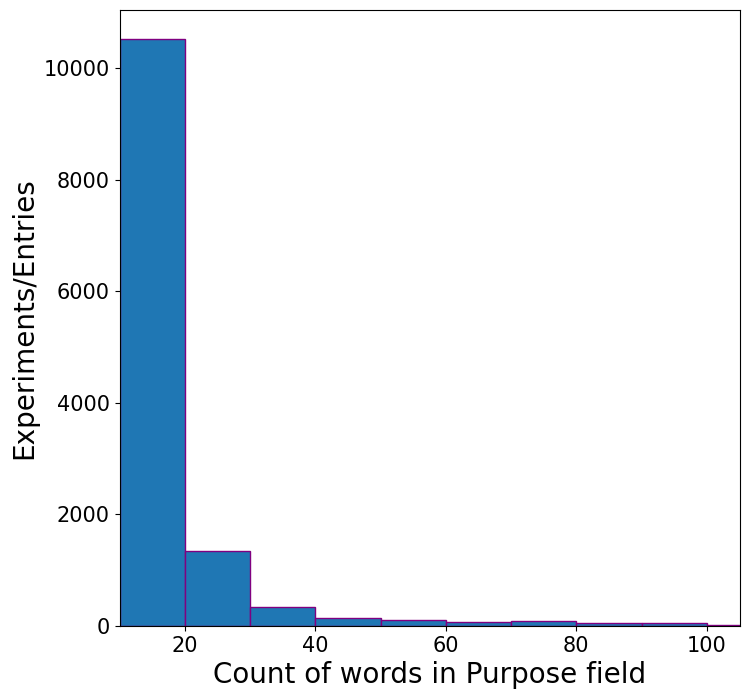

In [150]:
plt.figure(figsize=(8,8))
plt.hist(df_number_words_purpose_sorted['number_of_words_purpose'], bins=longitudes_objetivo_purpose ,edgecolor='purple')
#plt.title('Number of ', fontsize = 20)
plt.xlabel('Count of words in Purpose field', fontsize = 20)
plt.ylabel('Experiments/Entries', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(10, 105)
#plt.yscale('log')
#plt.grid(True)
plt.show()

In [134]:
threshold = 5
df_number_words_purpose_sorted_filtered = df_number_words_purpose_sorted[df_number_words_purpose_sorted['number_of_words_purpose'] < threshold]

In [135]:
df_number_words_purpose_sorted_filtered

,number_of_words_purpose,name
10465,3,changes to photoperiod
8835,3,changes to photoperiod
14956,3,photoperiod alteration study
2881,3,changes to photoperiod
5876,3,changes to photoperiod
3319,3,9:15 then DD
14772,3,changes to photoperiod
2649,3,changes to photoperiod
7550,3,changes to photoperiod
12371,2,Temperature-comp-photoreceptor mutants


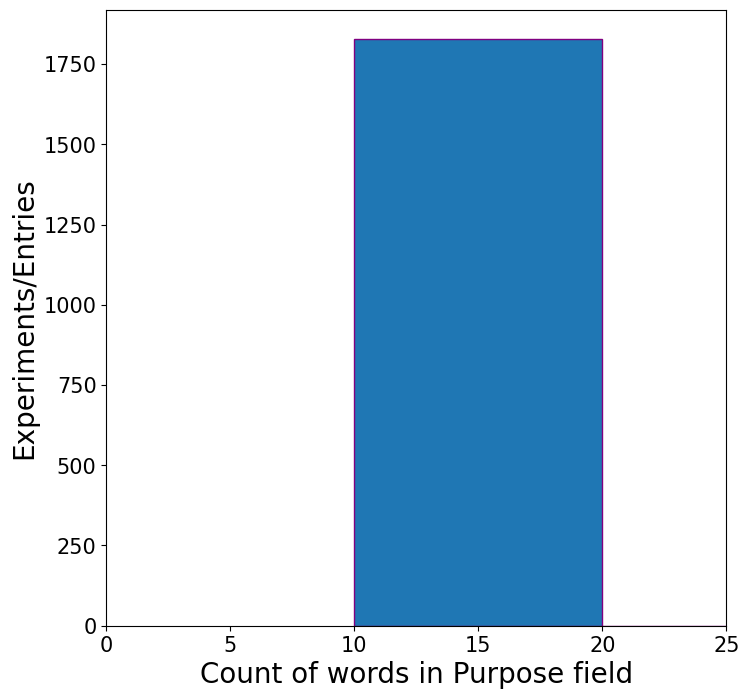

In [199]:
# Filter the data to include only values smaller than 5
filtered_data = df_number_words_purpose_sorted[df_number_words_purpose_sorted['number_of_words_purpose'] <= 10]['number_of_words_purpose']

# Plot the histogram with the filtered data
plt.figure(figsize=(8, 8))
plt.hist(filtered_data, bins=longitudes_objetivo_purpose, edgecolor='purple')
plt.xlabel('Count of words in Purpose field', fontsize=20)
plt.ylabel('Experiments/Entries', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 25)  # Set x-axis limit to show values smaller than 50
plt.show()